# Installation

In [3]:
!pip install numpy
!pip install matplotlib
!pip install imageio

# Step 1: Draw the initial shape (square)

1. We import numpy for numerical operations and matplotlib.pyplot for plotting.
2. The create_square() function generates the coordinates of a square's vertices.
3. We create a square with a square_side of 50.
4. plt.fill() draws the filled square.
5. plt.xlim() and plt.ylim() set the plot's axis limits.
6. plt.gca().set_aspect() maintains a square aspect ratio.
7. plt.show() displays the drawn square.

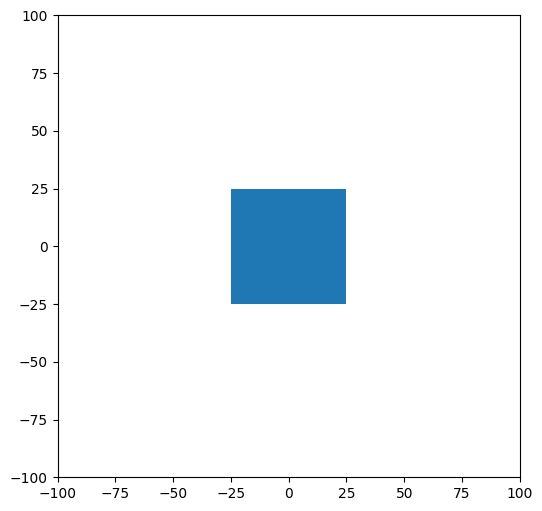

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def create_square(side):
    """Creates a square."""
    return np.array([[-side/2, -side/2],
                     [side/2, -side/2],
                     [side/2, side/2],
                     [-side/2, side/2]])

square_side = 50
square = create_square(square_side)

plt.figure(figsize=(6, 6))
plt.fill(square[:, 0], square[:, 1]) # Fills the square with color
plt.xlim(-100, 100) # Sets x-axis limits
plt.ylim(-100, 100) # Sets y-axis limits
plt.gca().set_aspect('equal', adjustable='box') # Ensures square aspect ratio
plt.show() # Displays the plot

# Step 2: Define the transformation matrix functions

1. We define functions to create translation, rotation, and scaling matrices.
2. The transform_points() function applies a given matrix to a set of points using homogeneous coordinates.

In [5]:
def translation_matrix(tx, ty):
    """Creates a translation matrix."""
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def rotation_matrix(angle):
    """Creates a rotation matrix."""
    angle_rad = np.radians(angle)
    return np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                     [np.sin(angle_rad), np.cos(angle_rad), 0],
                     [0, 0, 1]])

def scaling_matrix(sx, sy):
    """Creates a scaling matrix."""
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

def transform_points(points, matrix):
    """Applies a transformation matrix to points."""
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1)))) # Adds a 1 for homogeneous coordinates
    transformed_points = np.dot(homogeneous_points, matrix.T) # Applies the matrix
    return transformed_points[:, :2] # Returns the transformed x and y coordinates

# Step 3: Apply transformations to the square

1. We define the translation, rotation, and scaling parameters.
2. We create the combined transformation matrix by multiplying the individual matrices.
3. We apply the transformation to the square using transform_points().
4. We draw the transformed square.

## Step 3.1: Apply Translation (with original square reference)

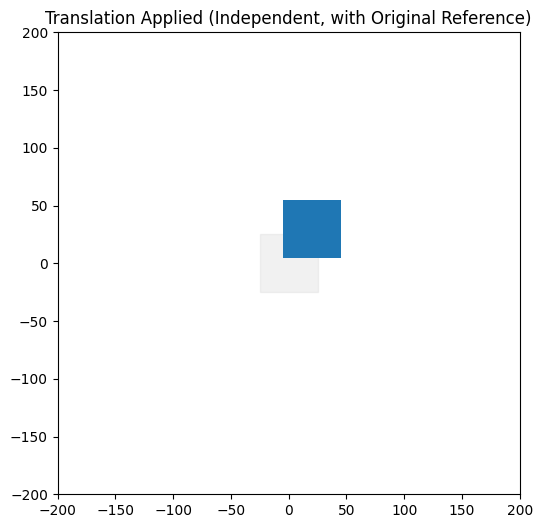

In [10]:
tx = 20  # Translation in x
ty = 30  # Translation in y

translation_matrix_applied = translation_matrix(tx, ty)
translated_square = transform_points(square, translation_matrix_applied)

plt.figure(figsize=(6, 6))
plt.fill(square[:, 0], square[:, 1], color='lightgray', alpha=0.3) # Original square, light gray
plt.fill(translated_square[:, 0], translated_square[:, 1]) # Translated square
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Translation Applied (Independent, with Original Reference)")
plt.show()

## Step 3.2: Apply Rotation (with original square reference)

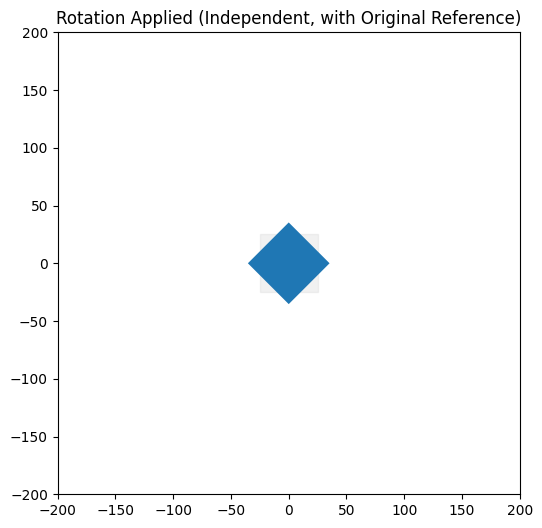

In [11]:
angle = 45 # Rotation angle in degrees

rotation_matrix_applied = rotation_matrix(angle)
rotated_square = transform_points(square, rotation_matrix_applied) # Apply to ORIGINAL square

plt.figure(figsize=(6, 6))
plt.fill(square[:, 0], square[:, 1], color='lightgray', alpha=0.3) # Original square, light gray
plt.fill(rotated_square[:, 0], rotated_square[:, 1]) # Rotated square
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Rotation Applied (Independent, with Original Reference)")
plt.show()

## Step 3.3: Apply Scaling (with original square reference)

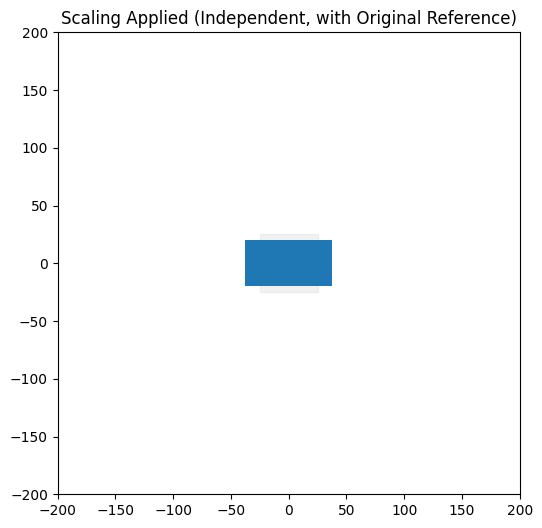

In [12]:
sx = 1.5 # Scaling in x
sy = 0.8 # Scaling in y

scaling_matrix_applied = scaling_matrix(sx, sy)
scaled_square = transform_points(square, scaling_matrix_applied) # Apply to ORIGINAL square

plt.figure(figsize=(6, 6))
plt.fill(square[:, 0], square[:, 1], color='lightgray', alpha=0.3) # Original square, light gray
plt.fill(scaled_square[:, 0], scaled_square[:, 1]) # Scaled square
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Scaling Applied (Independent, with Original Reference)")
plt.show()

# Step 4: Create the animation and GIF

1. We import the imageio library for creating the GIF.
2. We set the num_frames and animation_duration.
3. translation_distance defines how far to the right the square will move.
4. We loop through each frame:
  - We calculate a normalized time t from 0 to 1.
  - The horizontal translation tx increases linearly from 0 to translation_distance based on t.
  - The vertical translation ty remains 0.
  - We create the translation matrix.
  - We apply the translation to the original square.
  - We create a plot of the translated square, adjusting the xlim to accommodate the movement.
  - We save the frame as a PNG.
  - We read the PNG and add it to the frames list.
5. Finally, we use imageio.mimsave() to create the "translation_animation.gif" from the collected frames.
6. We display the generated GIF in the Colab output.

<ipython-input-23-b4fcda9744cf>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f"frame_{i}.png"))


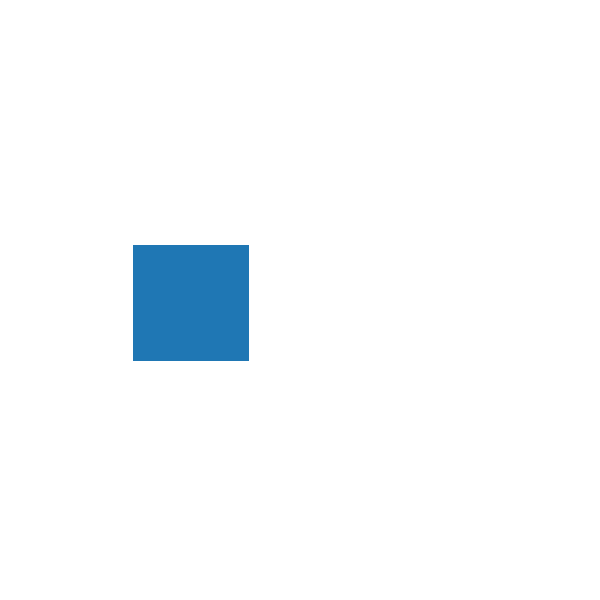

In [23]:
import imageio

num_frames = 30
animation_duration = 3  # seconds
translation_distance = 100

frames = []
for i in range(num_frames):
    t = i / (num_frames - 1) if num_frames > 1 else 0 # Normalized time (0 to 1)
    tx = translation_distance * t
    ty = 0  # No vertical translation

    translation_matrix_applied = translation_matrix(tx, ty)
    translated_square = transform_points(square, translation_matrix_applied)

    plt.figure(figsize=(6, 6))
    plt.fill(translated_square[:, 0], translated_square[:, 1])
    plt.xlim(-50, 150)  # Adjust x-axis limits to see the movement
    plt.ylim(-75, 75)   # Keep y-axis limits consistent
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig(f"frame_{i}.png")
    plt.close()

    frames.append(imageio.imread(f"frame_{i}.png"))

imageio.mimsave("translation_animation.gif", frames, duration=animation_duration / num_frames)

from IPython.display import Image
Image(filename="translation_animation.gif")